<a href="https://colab.research.google.com/github/nirvanK11/Sentiment-analysis/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np

# libraries for data preprocessing
import nltk
# download modules available with NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# libraries for data split and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 

RANDOM_SEED = 100

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
df = pd.read_csv('train.csv')

print(df.shape)
df.head()

(16363, 3)


,Id,Text,Sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [ ]:
df.isnull().sum()

Id           0
Text         0
Sentiment    0
dtype: int64

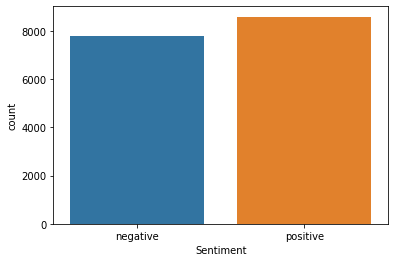

In [ ]:
# Summarise class details
sns.countplot(x=df['Sentiment'])

In [ ]:
# iterate through each row in 'Text' columm and convert text to tokens
list_tokenised_text = [word_tokenize(text) for text in df['Text']]
print(list_tokenised_text[:2])

list_tokenised_sentences = [' '.join(tokens) for tokens in list_tokenised_text]
print(list_tokenised_sentences[:2])

# add new column to data frame
df['Tokenised_Text'] = list_tokenised_sentences
df.head()

[['Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'here', 'in', 'San', 'Diego', '!', '!', '!'], ['my', 'boss', 'is', 'bullying', 'me', '...']]
['Sooo SAD I will miss you here in San Diego ! ! !', 'my boss is bullying me ...']


,Id,Text,Sentiment,Tokenised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of **** , why couldn`t they put them on t..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...


In [ ]:
wnl = WordNetLemmatizer()

list_lemmatised_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in list_tokenised_text:
  lemma_words = [wnl.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  list_lemmatised_sentences.append(lemma_sentence)
  
print(list_lemmatised_sentences[:2])

# add new column to data frame
df['Lemmatised_Text'] = list_lemmatised_sentences

df.head()

['Sooo SAD I will miss you here in San Diego ! ! !', 'my bos is bullying me ...']


,Id,Text,Sentiment,Tokenised_Text,Lemmatised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...,my bos is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of **** , why couldn`t they put them on t...","Sons of **** , why couldn`t they put them on t..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feeding for the baby are fun when he is al...


In [ ]:
# save updated data frame to a file
# This step is optional for the main flow. But by saving data to a file you can analyse the preprocessed text output more deeply. 
df.to_csv('/content/reviews_preprocessed.csv', index=False)

df.head()

,Id,Text,Sentiment,Tokenised_Text,Lemmatised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...,my bos is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of **** , why couldn`t they put them on t...","Sons of **** , why couldn`t they put them on t..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feeding for the baby are fun when he is al...


In [ ]:
# get English stopwords
stop_words = set(stopwords.words('english')) 
print(stop_words)

{'whom', 'mustn', 'hadn', 'was', 'didn', 'after', 'further', 'but', "you've", 'own', "you're", 'been', 'those', 'such', 'ours', 'be', "aren't", 'who', 't', 'will', "doesn't", "shan't", 'yours', 'wouldn', 'yourselves', 'it', 'when', 'did', 'of', 'themselves', 'as', 'down', 'the', 'between', 'with', 'wasn', 'any', 'your', 'about', 'aren', 'i', 'she', 'my', 'nor', 'being', 'their', 'which', 'yourself', "mightn't", 'against', 'won', 'o', 'myself', 've', 'don', 'for', 'few', 'each', 'above', 'only', 'y', 'at', 'we', "hadn't", 'have', "it's", 'what', 'that', 'these', 'can', 'through', 'am', 'shan', 'are', 'out', 'ma', 'over', 'up', 'why', 's', 'isn', "needn't", 'an', "haven't", 'do', "wouldn't", 'most', 'too', 'no', 'while', 'all', 'so', 're', 'shouldn', 'couldn', 'in', 'both', "couldn't", 'weren', 'on', 'once', 'to', "didn't", "weren't", 'before', 'himself', "she's", "isn't", 'haven', 'very', 'his', "that'll", 'had', 'hers', 'them', 'during', "should've", 'a', 'then', 'by', 'there', "you'll

In [ ]:
# use raw text
X_train_text, X_val_text, y_train, y_val = train_test_split(df['Text'], df['Sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_text)}')
print(f'validation data set size: {len(X_val_text)}')

# use tokenised text
X_train_tokenised_text, X_val_tokenised_text, y_train, y_val = train_test_split(df['Tokenised_Text'], df['Sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_tokenised_text)}')
print(f'validation data set size: {len(X_val_tokenised_text)}')

# use lemmatised text
X_train_lemmatised_text, X_val_lemmatised_text, y_train, y_val = train_test_split(df['Lemmatised_Text'], df['Sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_lemmatised_text)}')
print(f'validation data set size: {len(X_val_lemmatised_text)}')

# define class_names to using with plot_confusion_matrix
class_list = ['positive', 'negative']

training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909


In [ ]:
# method to plot confusion matrix
def plot_confusion_matrix(matrix, class_names):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions, class_names):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=class_names)
  return accuracy, confusion_matrix

SVM

In [ ]:
# method to train and predict using SVM classifier
def get_svm_predictions(X_train, X_val, y_train, y_val, class_names):
  # build model
  clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_names)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_names)

  return clf

**M1**

Accuracy: 0.8602566714198411


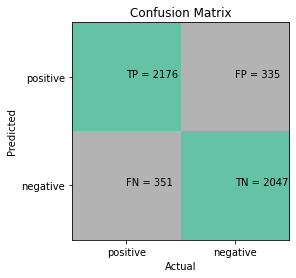

In [ ]:
vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m1 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

**M2**

Accuracy: 0.8690160928906091


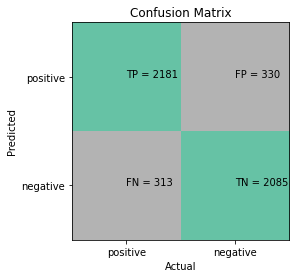

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m2 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

**M3**

Accuracy: 0.8690160928906091


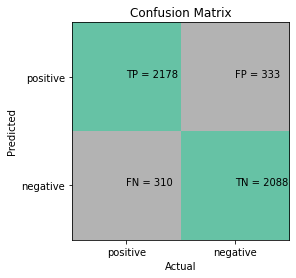

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m3 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

**M4**

Accuracy: 0.8688123854145448


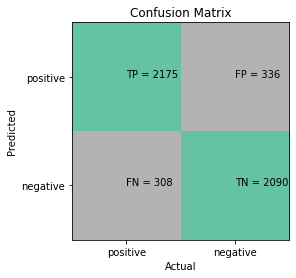

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m4 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)


**M5**

Accuracy: 0.8578121817070686


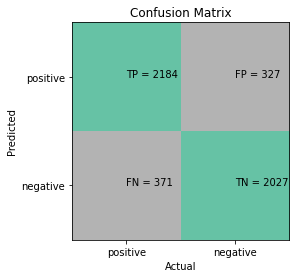

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m5 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

**M6**

Accuracy: 0.8590344265634549


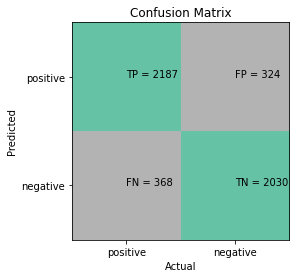

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m6 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

**DT**

In [ ]:
# method to train and predict using Decision Tree
def get_dt_predictions(X_train, X_val, y_train, y_val, class_list):
  # build model
  clf = tree.DecisionTreeClassifier(random_state=RANDOM_SEED)
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_list)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_list)

  return clf

Accuracy: 0.8056630678345895


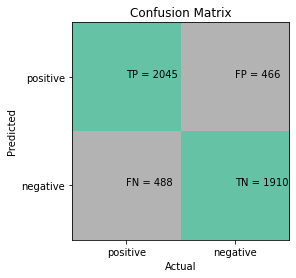

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m7 = get_dt_predictions(X_train, X_val, y_train, y_val, class_list)

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test

,Id,Text
0,96d74cb729,Shanghai is also really exciting (precisely -...
1,eee518ae67,"Recession hit Veronique Branquinho, she has to..."
2,01082688c6,happy bday!
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!
4,726e501993,that`s great!! weee!! visitors!
...,...,...
995,9b210c4a6f,Haha...YAY!!! I`M CURED!!!!
996,68c674acdb,"Sick, sick, sick. This sucks. i can`t even bre..."
997,6cadda7b98,Adding names to my Twitter account and learnin...
998,79a28b1ac7,ooh thats an early start ive got bed planned...


In [ ]:
# iterate through each row in 'Text' columm and convert text to tokens
list_tokenised_text = [word_tokenize(text) for text in df_test['Text']]
print(list_tokenised_text[:2])

list_tokenised_sentences = [' '.join(tokens) for tokens in list_tokenised_text]
print(list_tokenised_sentences[:2])

# add new column to data frame
df_test['Tokenised_Text'] = list_tokenised_sentences
df_test.head()

[['Shanghai', 'is', 'also', 'really', 'exciting', '(', 'precisely', '--', 'skyscrapers', 'galore', ')', '.', 'Good', 'tweeps', 'in', 'China', ':', '(', 'SH', ')', '(', 'BJ', ')', '.'], ['Recession', 'hit', 'Veronique', 'Branquinho', ',', 'she', 'has', 'to', 'quit', 'her', 'company', ',', 'such', 'a', 'shame', '!']]
['Shanghai is also really exciting ( precisely -- skyscrapers galore ) . Good tweeps in China : ( SH ) ( BJ ) .', 'Recession hit Veronique Branquinho , she has to quit her company , such a shame !']


,Id,Text,Tokenised_Text
0,96d74cb729,Shanghai is also really exciting (precisely -...,Shanghai is also really exciting ( precisely -...
1,eee518ae67,"Recession hit Veronique Branquinho, she has to...","Recession hit Veronique Branquinho , she has t..."
2,01082688c6,happy bday!,happy bday !
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!,http : //twitpic.com/4w75p - I like it ! !
4,726e501993,that`s great!! weee!! visitors!,that`s great ! ! weee ! ! visitors !


In [ ]:
wnl = WordNetLemmatizer()

list_lemmatised_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in list_tokenised_text:
  lemma_words = [wnl.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  list_lemmatised_sentences.append(lemma_sentence)
  
print(list_lemmatised_sentences[:2])

# add new column to data frame
df_test['Lemmatised_Text'] = list_lemmatised_sentences

df_test.head()

['Shanghai is also really exciting ( precisely -- skyscraper galore ) . Good tweeps in China : ( SH ) ( BJ ) .', 'Recession hit Veronique Branquinho , she ha to quit her company , such a shame !']


,Id,Text,Tokenised_Text,Lemmatised_Text
0,96d74cb729,Shanghai is also really exciting (precisely -...,Shanghai is also really exciting ( precisely -...,Shanghai is also really exciting ( precisely -...
1,eee518ae67,"Recession hit Veronique Branquinho, she has to...","Recession hit Veronique Branquinho , she has t...","Recession hit Veronique Branquinho , she ha to..."
2,01082688c6,happy bday!,happy bday !,happy bday !
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!,http : //twitpic.com/4w75p - I like it ! !,http : //twitpic.com/4w75p - I like it ! !
4,726e501993,that`s great!! weee!! visitors!,that`s great ! ! weee ! ! visitors !,that`s great ! ! weee ! ! visitor !


In [ ]:
# get English stopwords
stop_words = set(stopwords.words('english')) 
print(stop_words)

{'whom', 'mustn', 'hadn', 'was', 'didn', 'after', 'further', 'but', "you've", 'own', "you're", 'been', 'those', 'such', 'ours', 'be', "aren't", 'who', 't', 'will', "doesn't", "shan't", 'yours', 'wouldn', 'yourselves', 'it', 'when', 'did', 'of', 'themselves', 'as', 'down', 'the', 'between', 'with', 'wasn', 'any', 'your', 'about', 'aren', 'i', 'she', 'my', 'nor', 'being', 'their', 'which', 'yourself', "mightn't", 'against', 'won', 'o', 'myself', 've', 'don', 'for', 'few', 'each', 'above', 'only', 'y', 'at', 'we', "hadn't", 'have', "it's", 'what', 'that', 'these', 'can', 'through', 'am', 'shan', 'are', 'out', 'ma', 'over', 'up', 'why', 's', 'isn', "needn't", 'an', "haven't", 'do', "wouldn't", 'most', 'too', 'no', 'while', 'all', 'so', 're', 'shouldn', 'couldn', 'in', 'both', "couldn't", 'weren', 'on', 'once', 'to', "didn't", "weren't", 'before', 'himself', "she's", "isn't", 'haven', 'very', 'his', "that'll", 'had', 'hers', 'them', 'during', "should've", 'a', 'then', 'by', 'there', "you'll

In [ ]:
# use raw text
#X_test_text, X_val_text, y_test, y_val = train_test_split(df['Text'], test_size=0.3, random_state=RANDOM_SEED)
#print(f'test data set size: {len(X_test_text)}')
#print(f'validation data set size: {len(X_val_text)}')

# use tokenised text
#X_test_tokenised_text, X_val_tokenised_text, y_test, y_val = train_test_split(df['Tokenised_Text'], test_size=0.3, random_state=RANDOM_SEED)
#print(f'test data set size: {len(X_test_tokenised_text)}')
#print(f'validation data set size: {len(X_val_tokenised_text)}')

# use lemmatised text
#X_test_lemmatised_text, X_val_lemmatised_text, y_test, y_val = train_test_split(df['Lemmatised_Text'], test_size=0.3, random_state=RANDOM_SEED)
#print(f'test data set size: {len(X_test_lemmatised_text)}')
#print(f'validation data set size: {len(X_val_lemmatised_text)}')

# define class_names to using with plot_confusion_matrix
#class_list = ['positive', 'negative']

In [ ]:
# method to plot confusion matrix
def plot_confusion_matrix(matrix, class_names):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions, class_names):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=class_names)
  return accuracy, confusion_matrix

svm


In [ ]:
# method to train and predict using SVM classifier
def get_svm_predictions(X_test, X_val, y_test, y_val, class_names):
  # build model
  clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
  clf.fit(X_test, y_test)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_names)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_names)

  return clf

In [ ]:
vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_test_text)

# convert train and test text data to numeric vectors
X_test = vectorizer.transform(X_test_text)
X_val = vectorizer.transform(X_val_text)

m1 = get_svm_predictions(X_test, X_val, y_test, y_val, class_list)

NameError: ignored